# Image Segmentation


### DESCRIPTION

There is an image named “tiger.png.” Use k-means clustering with k set to 16 and cluster the image, which means that you want to keep just 16 colors in your compressed image.

### Objective
Open and display the image “tiger.png.” Convert the image into numpy array, so that it can be used in further processing. Find out the dimensions of the image and convert it into a two- dimensional array (Use k-means clustering for image segmentation, reducing the image to 16 colors).

In [1]:
# import required libraries
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

%matplotlib inline

In [2]:
img = Image.open('tiger.png')
img_np = np.asarray(img)
img_np[0:2]

array([[[164, 160, 159],
        [165, 161, 160],
        [164, 163, 161],
        ...,
        [160, 128,  90],
        [158, 125,  90],
        [161, 128,  93]],

       [[164, 160, 159],
        [164, 160, 159],
        [163, 162, 160],
        ...,
        [164, 132,  94],
        [162, 129,  94],
        [157, 124,  89]]], dtype=uint8)

In [3]:
img_np.shape

(720, 1280, 3)

In [4]:
pixels = img_np.reshape(img_np.shape[0] * img_np.shape[1], img_np.shape[2])
pixels

array([[164, 160, 159],
       [165, 161, 160],
       [164, 163, 161],
       ...,
       [119, 115, 106],
       [121, 117, 108],
       [122, 118, 109]], dtype=uint8)

In [5]:
pixels.shape

(921600, 3)

In [6]:
model = KMeans(n_clusters=16)
model.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
model.labels_

array([ 8,  8,  8, ..., 15, 15, 15])

In [8]:
model.cluster_centers_

array([[ 70.4788531 ,  69.58596321,  58.89351028],
       [175.36495263, 176.02261813, 176.30667938],
       [ 25.63610744,  19.8222165 ,  17.41659957],
       [130.97650219, 135.15877231, 124.32955598],
       [106.98041762,  70.23885918,  44.01105169],
       [137.15132811, 109.1613599 ,  84.19688972],
       [230.12262796, 229.04372659, 229.22777778],
       [178.14792686, 131.39629523, 107.36987715],
       [153.14100476, 155.84442496, 154.08094463],
       [ 58.02214288, 124.66587002,  40.58743413],
       [ 53.17202396,  43.62145635,  37.6432357 ],
       [202.45779039, 200.07823244, 198.69184658],
       [211.70082378, 168.8234211 , 134.49827168],
       [ 97.67558557, 139.94137767,  84.65727151],
       [ 94.24319368,  91.10601918,  82.08216572],
       [110.44942039, 111.28727123, 106.02322685]])

In [9]:
# Cluster Assignment
final = np.zeros((model.labels_.shape[0], 3))

for cluster_no in range(16):
    final[model.labels_ == cluster_no] = model.cluster_centers_[cluster_no]

final[0:5]

array([[153.14100476, 155.84442496, 154.08094463],
       [153.14100476, 155.84442496, 154.08094463],
       [153.14100476, 155.84442496, 154.08094463],
       [153.14100476, 155.84442496, 154.08094463],
       [153.14100476, 155.84442496, 154.08094463]])

In [10]:
# Reshape to original Dimention
comp_img = final.reshape(img_np.shape[0], img_np.shape[1], 3)
comp_img.shape

(720, 1280, 3)

In [11]:
# Convert the Pixel Values to Image
comp_img = Image.fromarray(np.uint8(comp_img))
comp_img.save('tiger_compressed.png')
img_1 = mpimg.imread('tiger.png')
img_2 = mpimg.imread('tiger_compressed.png')

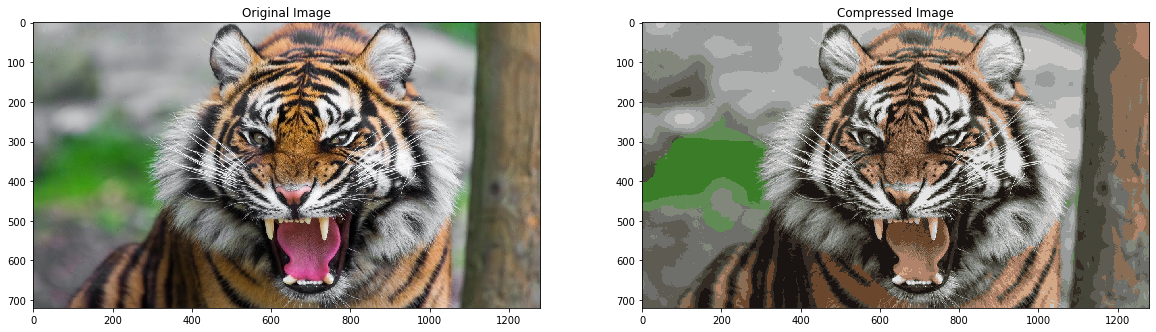

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))
ax1.imshow(img_1)
ax1.set_title('Original Image')
ax2.imshow(img_2)
ax2.set_title('Compressed Image')
plt.show()

# Thank You